# Final - 1/2025

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [100]:
# Opening JSON file
f = open("results/dt_1.json")
plot_data = json.load(f)
f.close()

f = open("results/rf_1.json")
plot_data_rf = json.load(f)
f.close()

f = open("results/SVM_1.json")
plot_data_svm = json.load(f)
f.close()

f = open("results/knn_1.json")
plot_data_knn = json.load(f)
f.close()

f = open("results/lm_1.json")
plot_data_lm = json.load(f)
f.close()

f = open("results/nb_1.json")
plot_data_nb = json.load(f)
f.close()


In [101]:
######

f = open("results/dt_2.json")
plot_data2 = json.load(f)
f.close()

f = open("results/rf_2.json")
plot_data_rf2 = json.load(f)
f.close()

f = open("results/svm_2.json")
plot_data_svm2 = json.load(f)
f.close()

f = open("results/knn_2.json")
plot_data_knn2 = json.load(f)
f.close()

f = open("results/lm_2.json")
plot_data_lm2 = json.load(f)
f.close()

f = open("results/nb_2.json")
plot_data_nb2 = json.load(f)
f.close()


In [102]:
######

f = open("results/dt_3.json")
plot_data3 = json.load(f)
f.close()

f = open("results/rf_3.json")
plot_data_rf3 = json.load(f)
f.close()

f = open("results/SVM_3.json")
plot_data_svm3 = json.load(f)
f.close()

f = open("results/knn_3.json")
plot_data_knn3 = json.load(f)
f.close()

f = open("results/lm_3.json")
plot_data_lm3 = json.load(f)
f.close()

f = open("results/nb_3.json")
plot_data_nb3 = json.load(f)
f.close()


In [103]:
######

f = open("results/dt_4.json")
plot_data4 = json.load(f)
f.close()

f = open("results/rf_4.json")
plot_data_rf4 = json.load(f)
f.close()

f = open("results/SVM_4.json")
plot_data_svm4 = json.load(f)
f.close()

f = open("results/knn_4.json")
plot_data_knn4 = json.load(f)
f.close()

f = open("results/lm_4.json")
plot_data_lm4 = json.load(f)
f.close()

f = open("results/nb_4.json")
plot_data_nb4 = json.load(f)
f.close()


In [104]:
######

f = open("results/dt_6.json")
plot_data5 = json.load(f)
f.close()

f = open("results/rf_6.json")
plot_data_rf5 = json.load(f)
f.close()

f = open("results/SVM_6.json")
plot_data_svm5 = json.load(f)
f.close()

f = open("results/knn_6.json")
plot_data_knn5 = json.load(f)
f.close()

f = open("results/lm_6.json")
plot_data_lm5 = json.load(f)
f.close()

f = open("results/nb_6.json")
plot_data_nb5 = json.load(f)
f.close()


In [105]:
def from_plot_data_to_df(plot_data):
    aggregated_data = {}
    for k, v in plot_data.items():
        aggregated_data[k] = {}
        for k1, v1 in v.items():
            if k1 not in ["aggregated", "cross"]:
                for k2, v2 in v1["results"].items():
                    # print(k2,v2)
                    if k2 in aggregated_data[k].keys():
                        aggregated_data[k][k2].append(v2)
                    else:
                        aggregated_data[k][k2] = [v2]
            if k1 == "cross":
                aggregated_data[k]["real_synth"] = []

                for k2, v2 in v1["real_synth"].items():
                    aggregated_data[k]["real_synth"].append(v2)
                aggregated_data[k]["synth_real"] = []

                for k2, v2 in v1["synth_real"].items():
                    aggregated_data[k]["synth_real"].append(v2)
                aggregated_data[k]["ratio_rs_sr"] = v1["aggregated"]

    return pd.DataFrame(aggregated_data)


df = from_plot_data_to_df(plot_data=plot_data)

In [106]:
# Flatten the DataFrame to have each list value in its own row
def melt_plot(xx):
    xx.iloc[-3:-1] = xx.iloc[-3:-1].map(lambda x: [sublist[0] for sublist in x])

    df_flattened = xx.apply(lambda x: x.explode()).reset_index(drop=False)
    df_flattened.set_index("index", inplace=True)
    df_melted = df_flattened.reset_index().melt(
        id_vars="index", var_name="X", value_name="Value"
    )

    return df_melted
    # Plotting the boxplot


In [107]:
def create_full_plot_data_dataset(jsondata=[], names=[]):
    melted_dfs = []

    for idx, jsondata_element in enumerate(jsondata):
        d1 = from_plot_data_to_df(plot_data=jsondata_element)
        d2 = melt_plot(d1)
        d2["source"] = names[idx]
        melted_dfs.append(d2)
    df_combined = pd.concat(melted_dfs, ignore_index=True)
    return df_combined


xx = create_full_plot_data_dataset(
    [plot_data, plot_data_knn, plot_data_lm, plot_data_nb, plot_data_rf, plot_data_svm],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx.to_csv("test.csv")


In [108]:
xx = create_full_plot_data_dataset(
    [plot_data, plot_data_knn, plot_data_lm, plot_data_nb, plot_data_rf, plot_data_svm],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx2 = create_full_plot_data_dataset(
    [
        plot_data2,
        plot_data_knn2,
        plot_data_lm2,
        plot_data_nb2,
        plot_data_rf2,
        plot_data_svm2,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx3 = create_full_plot_data_dataset(
    [
        plot_data3,
        plot_data_knn3,
        plot_data_lm3,
        plot_data_nb3,
        plot_data_rf3,
        plot_data_svm3,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx4 = create_full_plot_data_dataset(
    [
        plot_data4,
        plot_data_knn4,
        plot_data_lm4,
        plot_data_nb4,
        plot_data_rf4,
        plot_data_svm4,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)
xx6 = create_full_plot_data_dataset(
    [
        plot_data5,
        plot_data_knn5,
        plot_data_lm5,
        plot_data_nb5,
        plot_data_rf5,
        plot_data_svm5,
    ],
    ["dt", "knn", "lm", "nb", "rf", "svm"],
)


In [109]:
xxgrouped_all = [xx, xx2, xx3, xx4, xx6]

In [110]:
for df in xxgrouped_all:
    df["X"] = df["X"].str.replace("run ", "", regex=False)


In [140]:
ff = xxgrouped_all[0]

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_93767/2075427757.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx_grouped.replace(
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_93767/2075427757.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx_grouped.replace(
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_93767/2075427757.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result

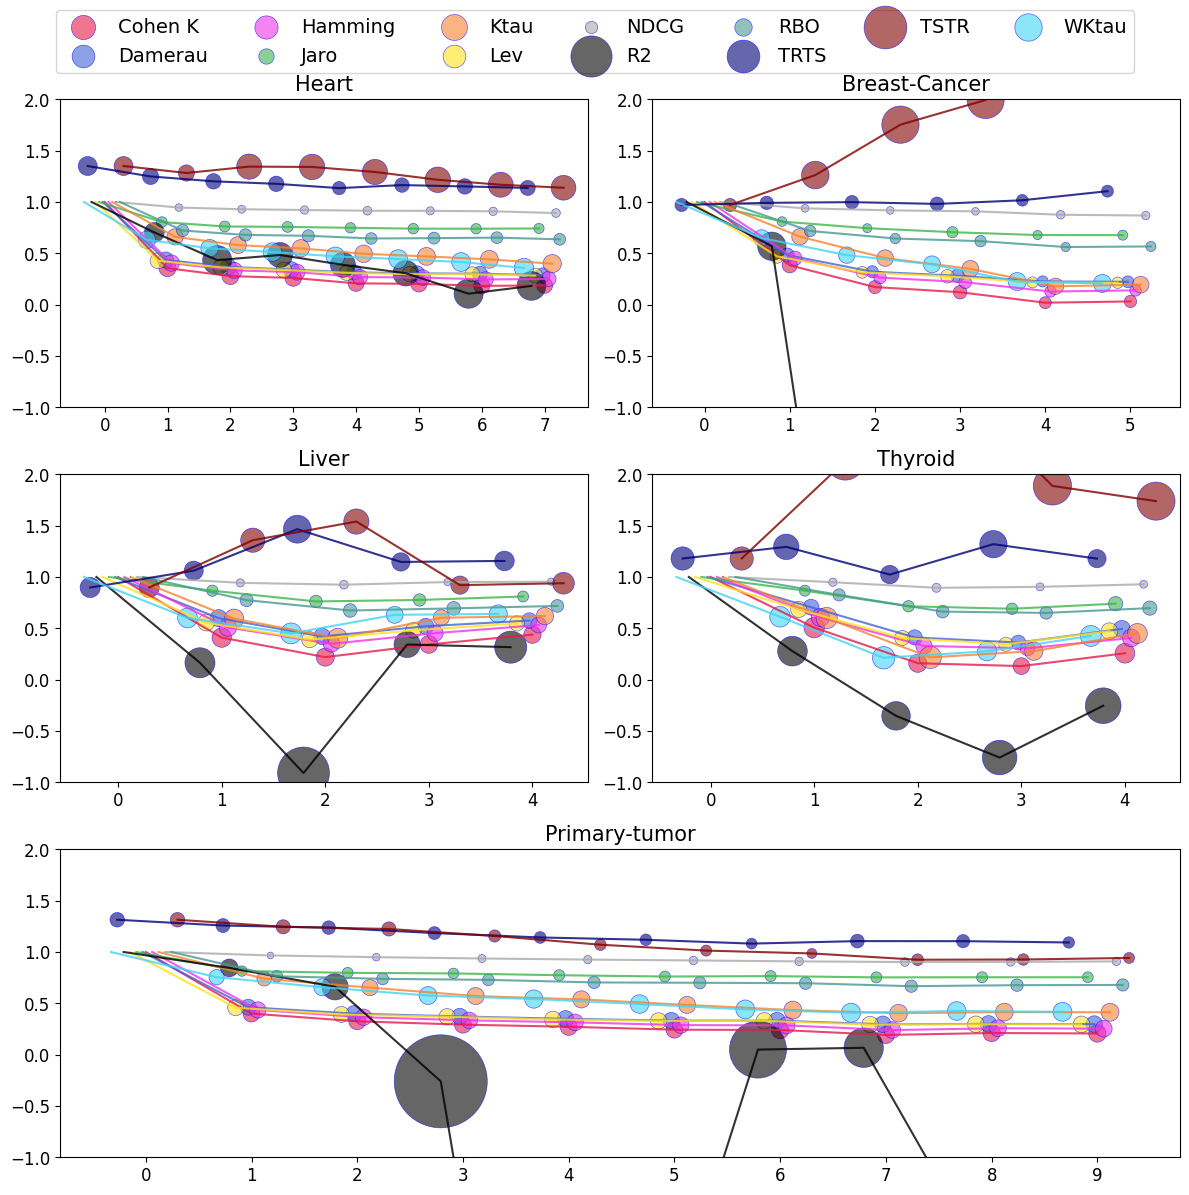

In [111]:
# Function to plot a single graph with jittered points, bubbles, and connecting lines
def plot_graph(ax, xx, title, color_map):
    # Group by 'index' and 'X' to calculate mean and variance
    xx_grouped = (
        xx.groupby(["index", "X"])
        .agg(Mean=("Value", "mean"), Variance=("Value", "var"))
        .reset_index()
    )
    xx_grouped = xx_grouped[xx_grouped["index"] != "ratio_rs_sr"]
    xx_grouped["X"] = xx_grouped["X"].astype(int)

    # Convert string 'X' to numeric codes for plotting
    xx_grouped["X_numeric"] = pd.Categorical(xx_grouped["X"]).codes

    # Calculate error as the square root of variance (standard deviation)
    xx_grouped["Error"] = xx_grouped["Variance"] ** 0.5

    # Apply jitter
    unique_indices = xx_grouped["index"].unique()
    jitter_dict = {
        index: ((-1) ** i) * 0.03 * i for i, index in enumerate(unique_indices)
    }
    xx_grouped["X_jittered"] = xx_grouped["X_numeric"] + xx_grouped["index"].map(
        jitter_dict
    )

    # Map index to more readable names
    xx_grouped.replace(
        {
            "synth_real": "TSTR",
            "real_synth": "TRTS",
            "ratio_rs_sr": "CC",
            "rbo": "RBO",
            "cross": "CC",
            "ndgc_score": "NDCG",
            "r2_score": "R2",
            "cohen_kappa_score": "Cohen K",
            "kendalltau": "Ktau",
            "levenshtein_normalized_similarity": "Lev",
            "jaro_winkler_normalized_similarity": "Jaro",
            "weightedtau": "WKtau",
            "damerau_levenshtein_normalized_similarity": "Damerau",
            "hamming_normalized_similarity": "Hamming",
        },
        inplace=True,
    )

    # Loop through each 'index' group to plot separately with jittered X values and bubble sizes
    for i, (index, group_data) in enumerate(xx_grouped.groupby("index")):
        color = color_map.get(index, "#000000")  # Default to black if color not found

        # Plot connecting lines
        ax.plot(
            group_data["X_jittered"],
            group_data["Mean"],
            color=color,
            linestyle="-",  # Solid line
            linewidth=1.5,
            alpha=0.8,
        )

        # Plot bubbles
        ax.scatter(
            group_data["X_jittered"],
            group_data["Mean"],
            s=group_data["Error"] * 500,  # Scale bubble size by the error value
            label=index,
            color=color,
            alpha=0.6,
            edgecolor="b",
            linewidth=0.5,
        )

    # Set integer ticks
    unique_x = sorted(xx_grouped["X"].unique())
    ax.set_xticks(unique_x)
    ax.set_xticklabels(unique_x)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis="both", labelsize=12)
    ax.set_ylim(-1, 2)


# Create a figure with 5 subplots (one row, five columns)
# fig, axes = plt.subplots(3, 2, figsize=(20, 13), sharey=True)
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 2, figure=fig)

# Create subplots
axes = [
    fig.add_subplot(gs[0, 0]),  # Row 0, Col 0
    fig.add_subplot(gs[0, 1]),  # Row 0, Col 1
    fig.add_subplot(gs[1, 0]),  # Row 1, Col 0
    fig.add_subplot(gs[1, 1]),  # Row 1, Col 1
    fig.add_subplot(gs[2, :]),  # Row 2, spans both columns
]
titles = ["Heart", "Breast-Cancer", "Liver", "Thyroid", "Primary-tumor"]
# Color palette
# colors = sns.color_palette("Set1", n_colors=13)
color_map = {
    "TSTR": "#800000",  # Red-Orange
    "TRTS": "#000075",  # Green
    "CC": "#9A6324",  # Blue
    "RBO": "#469990",  # Pink
    "R2": "#000000",  # Pink
    "Cohen K": "#e6194B",  # Pink
    "Ktau": "#f58231",  # Pink
    "Lev": "#ffe119",  # Pink
    "Jaro": "#3cb44b",  # Pink
    "WKtau": "#42d4f4",  # Pink
    "Damerau": "#4363d8",  # Pink
    "Hamming": "#f032e6",  # Pink
    "NDCG": "#a9a9a9",  # Yellow
}
# Assuming you have 5 DataFrames (similar to xx_grouped), loop through them and plot
for i in range(5):
    x = i // 2
    # Generate a set of colors with at least 11 different colors

    # Print the colors
    # print(colors)
    y = i % 2
    # print(x,y)

    # Here, assume you have a different xx_grouped for each graph, e.g., xx_grouped_1, xx_grouped_2, etc.
    # Replace `xx_grouped` with the appropriate dataset for each plot
    plot_graph(axes[i], xxgrouped_all[i], titles[i], color_map)

# Add a single legend for all subplots (outside the plots)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="",
    loc="upper center",
    bbox_to_anchor=(0.5, 1),
    fontsize="14",
    markerscale=2,
    ncol=7,
)

# Adjust layout to make space for the shared legend and titles
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusts layout, leaving space for the legend
plt.savefig("Viz/multiple_datasets_2_size.png")

plt.show()

In [112]:
# Define a function that will be applied
def create_cc_rows(row, name):
    # Find a match in df2 based on the 'value' column of df1
    vals = []
    dt = row["CC"][name]
    if name == "aggregated":
        vals = row["CC"][name]
    else:
        for k, v in dt.items():
            if v[0] == np.inf:
                vals.append(0)
            else:
                vals.append(v[0])

    return np.mean(vals)


In [113]:
with open("results/synth_result.pkl", "rb") as f:
    synth_result = pickle.load(f)
data_synth = {k: [] for k in synth_result[0]["aggregated"].keys()}
for i in synth_result:
    for k, v in i["aggregated"].items():
        data_synth[k].append(v)
bardata = pd.DataFrame(data_synth)
bardata["CC"] = [i["cross"] for i in synth_result]

# Create a new column in df1 using apply and lookup_function
bardata["real_synth"] = bardata.apply(create_cc_rows, axis=1, name="real_synth")
bardata["synth_real"] = bardata.apply(create_cc_rows, axis=1, name="synth_real")
bardata["CC"] = bardata.apply(create_cc_rows, axis=1, name="aggregated")

bardata

,ndgc_score,cohen_kappa_score,r2_score,levenshtein_normalized_similarity,kendalltau,weightedtau,rbo,damerau_levenshtein_normalized_similarity,jaro_winkler_normalized_similarity,hamming_normalized_similarity,CC,real_synth,synth_real
0,0.960867,0.184524,0.736307,0.285714,0.701465,0.678394,0.618446,0.291209,0.712510,0.247253,1.028745,0.991581,1.007346
1,0.920378,0.162500,0.257831,0.344444,0.466667,0.465882,0.639325,0.355556,0.751442,0.255556,0.969001,0.935013,0.999443
2,0.963797,0.314286,0.366061,0.523810,0.580952,0.682410,0.741270,0.571429,0.845238,0.428571,1.286598,1.290711,0.834839
3,0.972701,0.458333,-0.023204,0.566667,0.600000,0.696472,0.838889,0.633333,0.841111,0.566667,0.885456,2.017573,0.879778
4,0.946532,0.135417,0.730113,0.218954,0.549020,0.594943,0.673939,0.228758,0.733311,0.186275,0.992111,0.986303,1.081536


In [114]:
with open("results/synth_result_Ctgan.pkl", "rb") as f:
    synth_result_ctgan = pickle.load(f)
data_ctgan_synth = {k: [] for k in synth_result_ctgan[0]["aggregated"].keys()}
for i in synth_result_ctgan:
    for k, v in i["aggregated"].items():
        data_ctgan_synth[k].append(v)
bardata_ctgan = pd.DataFrame(data_ctgan_synth)
bardata_ctgan["CC"] = [i["cross"] for i in synth_result_ctgan]
bardata_ctgan
bardata_ctgan["real_synth"] = bardata_ctgan.apply(
    create_cc_rows, axis=1, name="real_synth"
)
bardata_ctgan["synth_real"] = bardata_ctgan.apply(
    create_cc_rows, axis=1, name="synth_real"
)
bardata_ctgan["CC"] = bardata_ctgan.apply(create_cc_rows, axis=1, name="aggregated")


In [115]:
with open("results/synth_result_gaussian.pkl", "rb") as f:
    synth_result_gaussian = pickle.load(f)
data_gaussian_synth = {k: [] for k in synth_result_gaussian[0]["aggregated"].keys()}
for i in synth_result_gaussian:
    for k, v in i["aggregated"].items():
        data_gaussian_synth[k].append(v)
bardata_gaussian = pd.DataFrame(data_gaussian_synth)
bardata_gaussian["CC"] = [i["cross"] for i in synth_result_gaussian]

bardata_gaussian["real_synth"] = bardata_gaussian.apply(
    create_cc_rows, axis=1, name="real_synth"
)
bardata_gaussian["synth_real"] = bardata_gaussian.apply(
    create_cc_rows, axis=1, name="synth_real"
)
bardata_gaussian["CC"] = bardata_gaussian.apply(
    create_cc_rows, axis=1, name="aggregated"
)
bardata_gaussian


,ndgc_score,cohen_kappa_score,r2_score,levenshtein_normalized_similarity,kendalltau,weightedtau,rbo,damerau_levenshtein_normalized_similarity,jaro_winkler_normalized_similarity,hamming_normalized_similarity,CC,real_synth,synth_real
0,0.960429,0.130952,0.391765,0.230769,0.580586,0.641456,0.588588,0.230769,0.698964,0.197802,0.995267,0.939514,1.641978
1,0.883747,0.075000,-0.109304,0.266667,0.022222,0.223432,0.601733,0.277778,0.705450,0.177778,1.211187,0.661902,3.170026
2,0.951925,0.142857,-1.533026,0.380952,0.523810,0.558212,0.724206,0.452381,0.822540,0.285714,1.033325,0.961463,0.956446
3,0.935357,0.208333,0.298321,0.400000,0.466667,0.463504,0.672222,0.433333,0.623333,0.366667,0.893762,1.902184,0.901813
4,0.915474,0.125000,0.399855,0.212418,0.397059,0.470384,0.688270,0.212418,0.764439,0.176471,0.927937,1.104905,0.857179


In [116]:
# df_avg = (df1 + df2 + df3) / 3
df_combined = pd.concat([bardata_gaussian, bardata_ctgan, bardata], ignore_index=True)
df_combined
df_combined.columns = [
    "NDCG",
    "Cohen k",
    "R2",
    "Lev",
    "Ktau",
    "WKtau",
    "RBO",
    "Damerau",
    "Jaro",
    "Hamming",
    "TRTS",
    "TSTR",
    "CC",
]
df_combined

,NDCG,Cohen k,R2,Lev,Ktau,WKtau,RBO,Damerau,Jaro,Hamming,TRTS,TSTR,CC
0,0.960429,0.130952,0.391765,0.230769,0.580586,0.641456,0.588588,0.230769,0.698964,0.197802,0.995267,0.939514,1.641978
1,0.883747,0.075000,-0.109304,0.266667,0.022222,0.223432,0.601733,0.277778,0.705450,0.177778,1.211187,0.661902,3.170026
2,0.951925,0.142857,-1.533026,0.380952,0.523810,0.558212,0.724206,0.452381,0.822540,0.285714,1.033325,0.961463,0.956446
3,0.935357,0.208333,0.298321,0.400000,0.466667,0.463504,0.672222,0.433333,0.623333,0.366667,0.893762,1.902184,0.901813
4,0.915474,0.125000,0.399855,0.212418,0.397059,0.470384,0.688270,0.212418,0.764439,0.176471,0.927937,1.104905,0.857179
5,0.946417,0.065476,0.380901,0.159341,0.547619,0.572976,0.551558,0.164835,0.666451,0.137363,1.034106,0.981182,1.579525
6,0.843004,0.050000,-0.110279,0.255556,0.150000,0.205318,0.596455,0.266667,0.738981,0.155556,1.029880,0.877431,4.596859
7,0.959583,0.342857,-0.054158,0.523810,0.485714,0.622546,0.686508,0.523810,0.802698,0.452381,1.120873,0.991904,2.257133
8,0.917142,0.166667,0.120909,0.500000,0.266667,0.308090,0.719444,0.533333,0.796667,0.333333,1.011348,0.810539,4.411822
9,0.919092,0.149306,0.473804,0.228758,0.424837,0.479340,0.685130,0.228758,0.764250,0.199346,0.963720,1.018844,0.857936


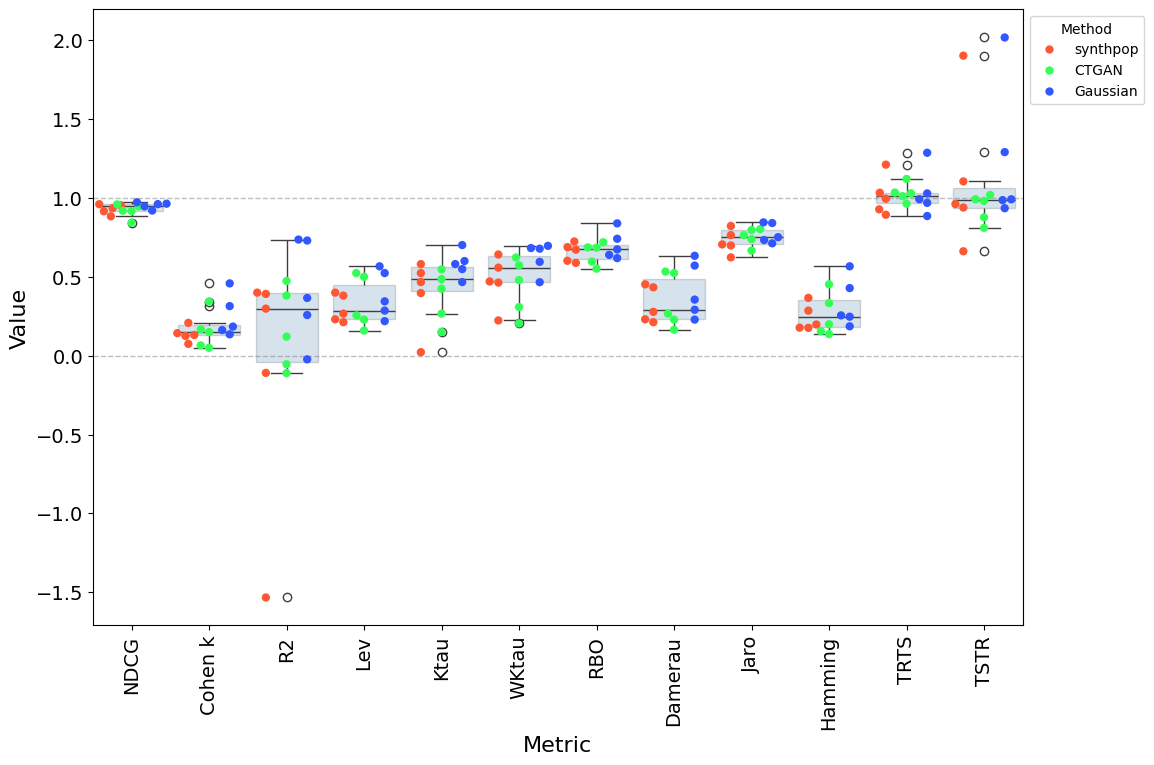

In [117]:
# Sample DataFrame (Assume you already have df_combined)
df_combined_plot = df_combined.copy()
df_combined_plot.drop(columns=["CC"], inplace=True)
# Add a column to group the row indices into groups of 5
df_combined_plot["Group"] = (
    df_combined_plot.index // 5
)  # Integer division to group every 5 rows

# Define custom group names based on index groups
group_names = {0: "synthpop", 1: "CTGAN", 2: "Gaussian"}
df_combined_plot["Group"] = df_combined_plot["Group"].map(group_names)

# Convert the DataFrame from wide-form to long-form for plotting
df_long = pd.melt(
    df_combined_plot, id_vars=["Group"], var_name="Metric", value_name="Value"
)

# Define custom colors for the groups
custom_palette = {"synthpop": "#FF5733", "CTGAN": "#33FF57", "Gaussian": "#3357FF"}

# Set the figure size before plotting
plt.figure(figsize=(12, 8))  # Adjust the size (width, height) as needed

# Create the violin plot
ax = sns.boxplot(x="Metric", y="Value", data=df_long, boxprops=dict(alpha=0.2))

# Add light horizontal lines at y=1 and y=0
ax.axhline(1, color="gray", linestyle="--", linewidth=1, alpha=0.5)
ax.axhline(0, color="gray", linestyle="--", linewidth=1, alpha=0.5)


# Overlay with a swarmplot next to the violin plot using dodge=True and custom colors
sns.swarmplot(
    x="Metric",
    y="Value",
    data=df_long,
    hue="Group",
    palette=custom_palette,
    dodge=True,
    size=6,
)

plt.xlabel("Metric", fontsize=16)  # Increase xlabel font size
plt.ylabel("Value", fontsize=16)  # Increase ylabel font size
plt.xticks(rotation=90, fontsize=14)  # Increase x-tick font size
plt.yticks(fontsize=14)  # Increase y-tick font size


# Set y-axis limits (optional)
# plt.ylim(0, 1.3)  # Adjust as needed

# Adjust the legend to be more informative
plt.legend(title="Method", bbox_to_anchor=(1.00, 1), loc="upper left")

# Save the figure to a file
plt.savefig(
    "Viz/synthetic_violin_swarm_colored_by_group_custom.png", bbox_inches="tight"
)

# Show the plot (optional)
plt.show()


In [145]:
def over_extract(
    grouped_df=[
        plot_data,
        plot_data_knn,
        plot_data_lm,
        plot_data_nb,
        plot_data_svm,
        plot_data_rf,
    ],
    dataset="heart",
    titles=["dt", "knn", "lm", "nb", "svm", "rf"],
):
    def extract_data_cc(plot_data, type, name):
        ff = []
        for k, v in plot_data.items():
            for k2, v2 in v["cross"].items():
                if k2 == "aggregated":
                    continue

                for k3, v3 in v2.items():
                    # print(k3,v3)

                    d = [k, k2, k3, v3[0], v3[1], v3[2], type, name]

                    ff.append(d)
        return pd.DataFrame(ff)

    gg = []
    j = 0
    for i in grouped_df:
        # print(j)
        gg.append(extract_data_cc(i, dataset, titles[j]))
        j += 1
    df_combined = pd.concat(gg, ignore_index=True)
    df_combined.columns = [
        "run",
        "type",
        "column",
        "ratio",
        "1-1",
        "1-2",
        "dataset",
        "method",
    ]

    return df_combined


In [146]:
df_combined = over_extract()
df_combined_d2 = over_extract(
    grouped_df=[
        plot_data2,
        plot_data_knn2,
        plot_data_lm2,
        plot_data_nb2,
        plot_data_svm2,
        plot_data_rf2,
    ],
    dataset="thyroid",
)
df_combined_d2

df_combined_d3 = over_extract(
    grouped_df=[
        plot_data3,
        plot_data_knn3,
        plot_data_lm3,
        plot_data_nb3,
        plot_data_svm3,
        plot_data_rf3,
    ],
    dataset="breast-cancer",
)
df_combined_d3

df_combined_d4 = over_extract(
    grouped_df=[
        plot_data4,
        plot_data_knn4,
        plot_data_lm4,
        plot_data_nb4,
        plot_data_svm4,
        plot_data_rf4,
    ],
    dataset="liver",
)
df_combined_d4

df_combined_d5 = over_extract(
    grouped_df=[
        plot_data5,
        plot_data_knn5,
        plot_data_lm5,
        plot_data_nb5,
        plot_data_svm5,
        plot_data_rf5,
    ],
    dataset="primary-tumour",
)
df_combined_d5

,run,type,column,ratio,1-1,1-2,dataset,method
0,run 0,real_synth,class,1.953895,0.397059,0.775811,primary-tumour,dt
1,run 0,real_synth,age,1.746313,0.500000,0.873156,primary-tumour,dt
2,run 0,real_synth,sex,1.255693,0.735294,0.923304,primary-tumour,dt
3,run 0,real_synth,histologic-type,1.178010,0.808824,0.952802,primary-tumour,dt
4,run 0,real_synth,degree-of-diffe,1.367659,0.647059,0.884956,primary-tumour,dt
...,...,...,...,...,...,...,...,...
2155,run 9,synth_real,neck,0.940698,0.852941,0.802360,primary-tumour,rf
2156,run 9,synth_real,supraclavicular,1.057276,0.705882,0.746313,primary-tumour,rf
2157,run 9,synth_real,axillar,1.076851,0.838235,0.902655,primary-tumour,rf
2158,run 9,synth_real,mediastinum,0.915192,0.705882,0.646018,primary-tumour,rf


In [147]:
full_df_combined = pd.concat(
    [df_combined_d5, df_combined, df_combined_d2, df_combined_d3, df_combined_d4]
)
continuous_values = ["Age", "trestbps", "chol", "thalach", "oldpeak"]
continuous_values2 = [
    "Clump_Thickness",
    "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape",
    "Marginal_Adhesion",
    "Single_Epithelial_Cell_Size",
    "Bare_Nuclei",
    "Bland_Chromatin",
    "Normal_Nucleoli",
    "Mitoses",
]
continuous_values3 = ["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks"]
continuous_values4 = ["T3", "TST", "TSTRI", "TSH", "TMAX"]
continuous_values6 = [""]

full_df_combined["column_type"] = "Categorical"


def categorize_columns(row):
    if row["column"] in continuous_values:
        return "Continuous"
    elif row["column"] in continuous_values2:
        return "Continuous"
    elif row["column"] in continuous_values3:
        return "Continuous"
    elif row["column"] in continuous_values4:
        return "Continuous"
    elif row["column"] in continuous_values6:
        return "Continuous"
    else:
        return "Categorical"


# Apply the function to the 'type' column
full_df_combined["column_type"] = full_df_combined.apply(categorize_columns, axis=1)
full_df_combined

,run,type,column,ratio,1-1,1-2,dataset,method,column_type
0,run 0,real_synth,class,1.953895,0.397059,0.775811,primary-tumour,dt,Categorical
1,run 0,real_synth,age,1.746313,0.500000,0.873156,primary-tumour,dt,Categorical
2,run 0,real_synth,sex,1.255693,0.735294,0.923304,primary-tumour,dt,Categorical
3,run 0,real_synth,histologic-type,1.178010,0.808824,0.952802,primary-tumour,dt,Categorical
4,run 0,real_synth,degree-of-diffe,1.367659,0.647059,0.884956,primary-tumour,dt,Categorical
...,...,...,...,...,...,...,...,...,...
355,run 4,synth_real,T3,0.783392,159.867059,125.238509,liver,rf,Continuous
356,run 4,synth_real,TST,0.856008,12.181354,10.427340,liver,rf,Continuous
357,run 4,synth_real,TSTRI,1.599290,0.669521,1.070759,liver,rf,Continuous
358,run 4,synth_real,TSH,5.109620,8.623878,44.064746,liver,rf,Continuous


In [157]:
result = (
    full_df_combined.groupby(["column_type", "type", "method"])[["ratio", "1-1", "1-2"]]
    .agg(["mean", "std"])
    .reset_index()
)

result.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col for col in result.columns
]
result


,column_type_,type_,method_,ratio_mean,ratio_std,1-1_mean,1-1_std,1-2_mean,1-2_std
0,Categorical,real_synth,dt,1.198378,0.210965,0.673480,0.161059,0.784177,0.140640
1,Categorical,real_synth,knn,1.194108,0.205575,0.673981,0.160897,0.783295,0.144446
2,Categorical,real_synth,lm,1.196751,0.209812,0.672005,0.160512,0.782606,0.142961
3,Categorical,real_synth,nb,1.205436,0.228662,0.670665,0.165146,0.782930,0.147558
4,Categorical,real_synth,rf,1.186526,0.202968,0.675433,0.157940,0.782341,0.147543
5,Categorical,real_synth,svm,1.193599,0.204208,0.672298,0.158162,0.783036,0.147343
6,Categorical,synth_real,dt,1.083142,0.237272,0.700316,0.142583,0.746428,0.163767
7,Categorical,synth_real,knn,1.084516,0.242025,0.700316,0.142583,0.747020,0.163693
8,Categorical,synth_real,lm,1.082905,0.239652,0.700316,0.142583,0.746270,0.164533
9,Categorical,synth_real,nb,1.084192,0.238200,0.700316,0.142583,0.747383,0.163271


In [158]:
result["mean1"] = result["1-1_mean"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["std1"] = result["1-1_std"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["mean2"] = result["1-2_mean"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["std2"] = result["1-2_std"].apply(
    lambda x: round(x, 3) if x < 1 else int(round(x))
)
result["ratio_mean"] = result["ratio_mean"].apply(
    lambda x: round(x, 3) if x < 10 else int(round(x))
)
result["ratio_std"] = result["ratio_std"].apply(
    lambda x: round(x, 3) if x < 10 else int(round(x))
)

result["concatenated1"] = result.apply(
    lambda row: f"{row['mean1']} ({row['std1']})", axis=1
)
result["concatenated2"] = result.apply(
    lambda row: f"{row['mean2']} ({row['std2']})", axis=1
)
result["concatenated3"] = result.apply(
    lambda row: f"{row['ratio_mean']} ({row['ratio_std']})", axis=1
)

result = result[
    [
        "column_type_",
        "type_",
        "method_",
        "concatenated1",
        "concatenated2",
        "concatenated3",
    ]
]

In [159]:
result

,column_type_,type_,method_,concatenated1,concatenated2,concatenated3
0,Categorical,real_synth,dt,0.673 (0.161),0.784 (0.141),1.198 (0.211)
1,Categorical,real_synth,knn,0.674 (0.161),0.783 (0.144),1.194 (0.206)
2,Categorical,real_synth,lm,0.672 (0.161),0.783 (0.143),1.197 (0.21)
3,Categorical,real_synth,nb,0.671 (0.165),0.783 (0.148),1.205 (0.229)
4,Categorical,real_synth,rf,0.675 (0.158),0.782 (0.148),1.187 (0.203)
5,Categorical,real_synth,svm,0.672 (0.158),0.783 (0.147),1.194 (0.204)
6,Categorical,synth_real,dt,0.7 (0.143),0.746 (0.164),1.083 (0.237)
7,Categorical,synth_real,knn,0.7 (0.143),0.747 (0.164),1.085 (0.242)
8,Categorical,synth_real,lm,0.7 (0.143),0.746 (0.165),1.083 (0.24)
9,Categorical,synth_real,nb,0.7 (0.143),0.747 (0.163),1.084 (0.238)


In [161]:
# Pivot the table to get separate columns for each type_
pivoted_df = result.pivot_table(
    index=["column_type_", "method_"],
    columns="type_",
    values=["concatenated1", "concatenated2", "concatenated3"],
    aggfunc="first",
).reset_index()
pivoted_df


column_type_ method_  concatenated1                 concatenated2  \
type_                          real_synth     synth_real     real_synth   
0      Categorical      dt  0.673 (0.161)    0.7 (0.143)  0.784 (0.141)   
1      Categorical     knn  0.674 (0.161)    0.7 (0.143)  0.783 (0.144)   
2      Categorical      lm  0.672 (0.161)    0.7 (0.143)  0.783 (0.143)   
3      Categorical      nb  0.671 (0.165)    0.7 (0.143)  0.783 (0.148)   
4      Categorical      rf  0.675 (0.158)    0.7 (0.143)  0.782 (0.148)   
5      Categorical     svm  0.672 (0.158)    0.7 (0.143)  0.783 (0.147)   
6       Continuous      dt  275.0 (719.0)  324.0 (840.0)  236.0 (571.0)   
7       Continuous     knn  316.0 (796.0)  324.0 (840.0)  244.0 (595.0)   
8       Continuous      lm  283.0 (758.0)  324.0 (840.0)  242.0 (590.0)   
9       Continuous      nb  288.0 (713.0)  324.0 (840.0)  243.0 (586.0)   
10      Continuous      rf  324.0 (907.0)  324.0 (840.0)  242.0 (588.0)   
11      Continuous     svm  283.0 (727.0)  324.0 (840.0)  244.0 (594.0)   

                      concatenated3                 
type_     synth_real     real_synth     synth_real  
0      0.746 (0.164)  1.198 (0.211)  1.083 (0.237)  
1      0.747 (0.164)  1.194 (0.206)  1.085 (0.242)  
2      0.746 (0.165)   1.197 (0.21)   1.083 (0.24)  
3      0.747 (0.163)  1.205 (0.229)  1.084 (0.238)  
4      0.744 (0.164)  1.187 (0.203)   1.08 (0.239)  
5      0.747 (0.164)  1.194 (0.204)  1.084 (0.239)  
6      269.0 (612.0)  1.109 (0.386)  1.795 (1.523)  
7      277.0 (637.0)  1.025 (0.422)  1.824 (1.526)  
8      272.0 (628.0)  1.123 (0.392)  1.806 (1.532)  
9      278.0 (642.0)   1.04 (0.407)  1.797 (1.482)  
10     276.0 (632.0)  1.059 (0.401)  1.832 (1.549)  
11     278.0 (638.0)  1.073 (0.396)   1.81 (1.524)

In [162]:
# Flatten the MultiIndex columns
pivoted_df.columns = [
    "_".join(col).strip() if col[1] else col[0] for col in pivoted_df.columns.values
]
pivoted_df.columns = [
    "Column Type",
    "Method",
    "Real on real",
    "Real on synth",
    "Synth on synth",
    "Synth on real",
    "Ratio real over synth",
    "Ratio synth over real",
]
pivoted_df.replace(
    {"dt": "DT", "knn": "KNN", "nb": "NB", "lm": "LM", "rf": "RF", "svm": "SVM"},
    inplace=True,
)
pivoted_df.to_csv("model2.csv")